## **Example Application of SparsePLS**


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import sklearn

# Import the SparsePLS class
from model import SparsePLS

# If DataPreprocessor is in a separate file, import it as well
from preprocessing import DataPreprocessor

### **1. Generate Synthetic Data**

We'll create a synthetic regression dataset with informative features.



In [2]:
# Generate synthetic data
X, y, coef = make_regression(
    n_samples=200,
    n_features=50,
    n_informative=10,
    noise=0.1,
    coef=True,
    random_state=42
)

# Convert to pandas DataFrame for better handling of feature names
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)
y = pd.Series(y, name='target')

### **2. Split the Data**

Split the dataset into training and testing sets.



In [3]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ensure that X_train and X_test are DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [4]:
print(type(X_train))
print(type(X_test))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### **3. Initialize and Fit the SparsePLS Model**

Instantiate the `SparsePLS` model and fit it to the training data.

In [5]:
# Initialize the SparsePLS model
model = SparsePLS(
    n_components=2,     # Number of components
    alpha=0.5,          # Sparsity controlling parameter
    max_iter=1000,      # Maximum number of iterations
    tol=1e-6,           # Convergence tolerance
    scale=True,         # Whether to scale the data
    scale_method='standard'  # Scaling method
)

# Fit the model to the training data
model.fit(X_train, y_train)

feature_names_in_ is set during fit.


SparsePLS(alpha=0.5, max_iter=1000)

### **4. Make Predictions**

Use the trained model to predict target values for the test set.


In [6]:
# Predict on the test set
y_pred = model.predict(X_test)

### **5. Evaluate the Model**

Calculate the Mean Squared Error (MSE) to evaluate model performance.

In [7]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 1349.6938


### **6. Hyperparameter Optimization**

Use the `optimize_parameters` method to find the best hyperparameters.

In [8]:
# Define the parameter grid for optimization
param_grid = {
    'n_components': [1, 2, 3],
    'alpha': [0.1, 0.5, 1.0]
}

# Ensure X_train and y_train are DataFrames/Series with proper names
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=feature_names)

if not isinstance(y_train, (pd.Series, pd.DataFrame)):
    y_train = pd.Series(y_train, name='target')
    
# Optimize hyperparameters
model.optimize_parameters(
    X_train, y_train,
    param_grid=param_grid,
    cv=5,                          # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,                     # Use all available CPU cores
    verbose=1                      # Print progress messages
)


Optimizing over parameter grid:
{'alpha': 0.1, 'n_components': 1}
{'alpha': 0.1, 'n_components': 2}
{'alpha': 0.1, 'n_components': 3}
{'alpha': 0.5, 'n_components': 1}
{'alpha': 0.5, 'n_components': 2}
{'alpha': 0.5, 'n_components': 3}
{'alpha': 1.0, 'n_components': 1}
{'alpha': 1.0, 'n_components': 2}
{'alpha': 1.0, 'n_components': 3}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Params: {'alpha': 0.1, 'n_components': 1}, Mean Score: -6177.1063, Std: 2005.2570


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Params: {'alpha': 0.1, 'n_components': 2}, Mean Score: -2518.0362, Std: 979.1443
Params: {'alpha': 0.1, 'n_components': 3}, Mean Score: -934.0784, Std: 279.3029
Params: {'alpha': 0.5, 'n_components': 1}, Mean Score: -6094.7752, Std: 1970.9265
Params: {'alpha': 0.5, 'n_components': 2}, Mean Score: -2468.4533, Std: 963.2273
Params: {'alpha': 0.5, 'n_components': 3}, Mean Score: -914.1465, Std: 285.2270
Params: {'alpha': 1.0, 'n_components': 1}, Mean Score: -5990.4703, Std: 1931.5578
Params: {'alpha': 1.0, 'n_components': 2}, Mean Score: -2417.6546, Std: 944.6457
Params: {'alpha': 1.0, 'n_components': 3}, Mean Score: -933.3412, Std: 316.5271
Best parameters found: {'alpha': 0.5, 'n_components': 3}
feature_names_in_ is set during fit.


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


SparsePLS(alpha=0.5, max_iter=1000, n_components=3)

### **7. Evaluate the Optimized Model**

Make predictions with the optimized model and evaluate its performance.

In [13]:
# Predict on the test set with the optimized model
y_pred_optimized = model.predict(X_test)

# Calculate MSE
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print(f"Optimized Mean Squared Error: {mse_optimized:.4f}")


Optimized Mean Squared Error: 451.8826


### **8. Interpret the Results**

Identify the selected features and visualize their importance.


Selected Features:
['feature_0' 'feature_1' 'feature_2' 'feature_3' 'feature_4' 'feature_5'
 'feature_6' 'feature_7' 'feature_8' 'feature_9' 'feature_10' 'feature_11'
 'feature_12' 'feature_13' 'feature_14' 'feature_15' 'feature_16'
 'feature_17' 'feature_18' 'feature_19' 'feature_20' 'feature_21'
 'feature_22' 'feature_23' 'feature_24' 'feature_25' 'feature_26'
 'feature_27' 'feature_28' 'feature_29' 'feature_30' 'feature_31'
 'feature_32' 'feature_33' 'feature_34' 'feature_35' 'feature_36'
 'feature_37' 'feature_38' 'feature_39' 'feature_40' 'feature_41'
 'feature_42' 'feature_43' 'feature_44' 'feature_45' 'feature_46'
 'feature_47' 'feature_48' 'feature_49']


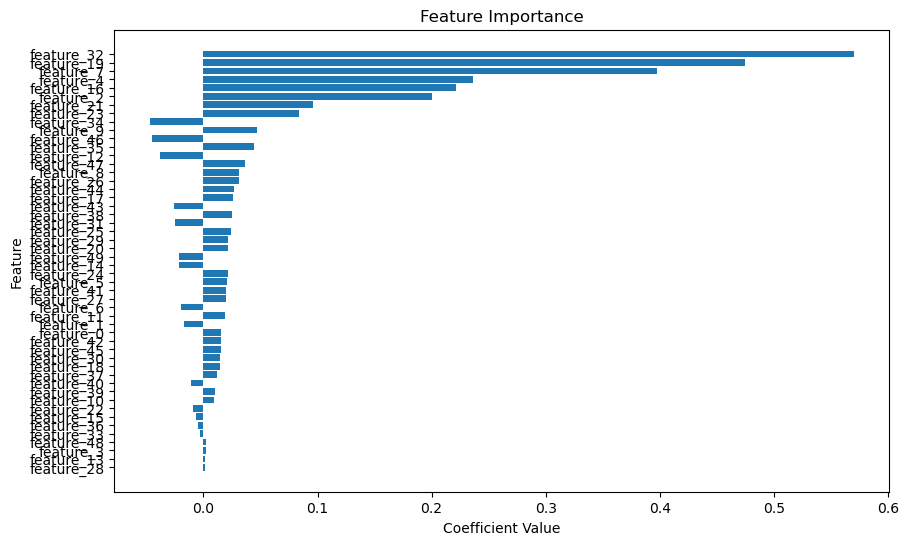

In [14]:
# Get selected variables
selected_features = model.feature_names_in_[model.selected_variables_]
print("Selected Features:")
print(selected_features)


# Get coefficients for the selected features
coefficients = model.coef_.ravel()[model.selected_variables_]

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
feature_importance['AbsCoefficient'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='AbsCoefficient', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance['Feature'],
    feature_importance['Coefficient']
)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


### **9. Visualize Predicted vs Actual Values**

Plot the predicted values against the actual target values.


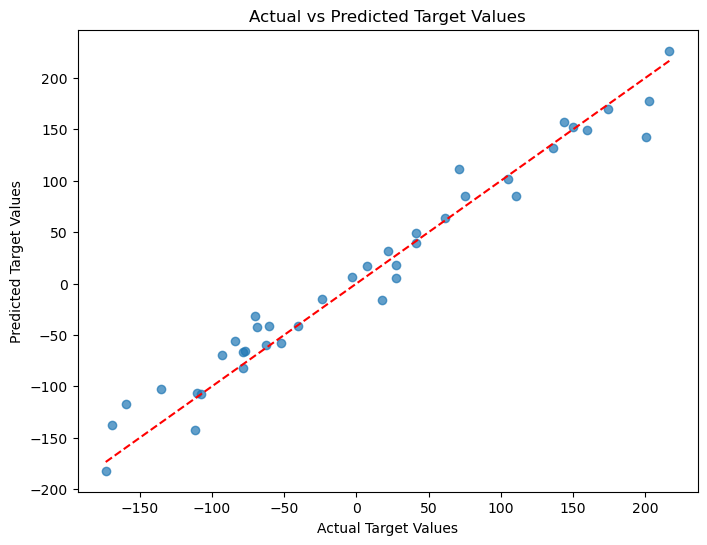

In [15]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values')
plt.show()

### **10. Conclusion**

The `SparsePLS` model effectively selects important features and predicts the target variable with reasonable accuracy. By incorporating sparsity, it enhances model interpretability by focusing on the most relevant variables.
